In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

In [2]:
pwd = os.getcwd()
pwd = os.path.join(pwd, 'data')
filepath = os.path.join(pwd, 'final_file.csv')
final_df = pd.read_csv(filepath)
final_df.drop(columns=['id'], inplace=True)
final_df

,number_of_contracts,average_data_non_roaming,average_data_roaming,average_invoice,last_invoice,churn,gender,senior_citizen,subscription_duration,average_minutes_roaming,average_minutes_non_roaming_our_operator,average_minutes_non_roaming_other_operator,average_sms_roaming,average_sms_non_roaming_our_operator,average_sms_non_roaming_other_operator
0,2,31.092257,51.854201,49.805556,41.0,0,0,0,2693,31.831960,64.838550,217.999176,0.508364,0.386617,1.613383
1,1,29.985774,53.895397,43.694444,27.0,0,1,0,7544,26.220921,62.532218,216.608368,0.462559,0.447393,1.617062
2,2,27.392915,54.743156,49.805556,19.0,0,1,0,5337,31.363929,57.785024,225.610306,0.536706,0.385913,1.615079
3,2,27.232053,60.885643,44.083333,55.0,0,0,0,1570,25.888147,61.686144,211.398164,0.498605,0.394419,1.622326
4,1,27.206813,55.101379,45.500000,71.0,0,1,0,5087,26.841038,48.312247,226.545012,0.538462,0.379620,1.667333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,29.539174,57.104465,43.194444,19.0,0,1,0,5329,23.842460,53.214827,217.833193,0.569597,0.447802,1.548535
996,1,31.287029,71.470293,43.777778,53.0,0,0,0,3697,23.697908,58.019247,223.001674,0.556553,0.434470,1.577199
997,1,28.300242,58.541566,41.388889,7.0,0,0,0,3703,25.316384,36.225989,144.425343,0.543877,0.384764,1.572806
998,2,34.655959,64.060017,48.638889,104.0,0,0,0,1758,31.006762,53.535080,212.391378,0.542643,0.469541,1.690722


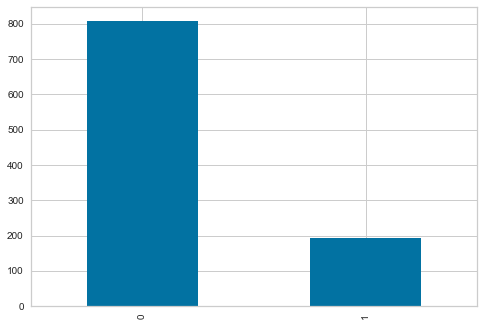

In [3]:
final_df['churn'].value_counts().plot(kind='bar')
plt.show()

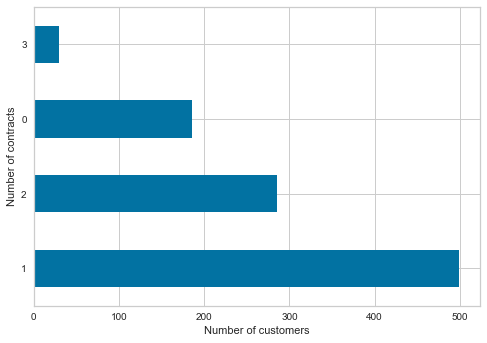

In [4]:
final_df['number_of_contracts'].value_counts().plot(kind="barh")
plt.xlabel("Number of customers")
plt.ylabel("Number of contracts")
plt.show()

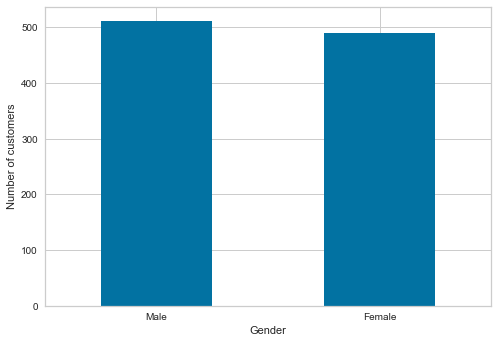

In [5]:
final_df['gender'].value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Number of customers")

bars = ('Male', 'Female')
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars, rotation=360)
plt.show()

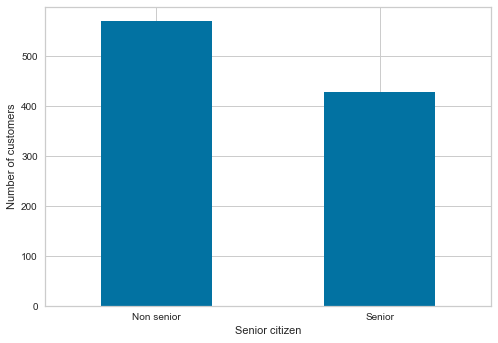

In [6]:
final_df['senior_citizen'].value_counts().plot(kind="bar")
plt.xlabel("Senior citizen")
plt.ylabel("Number of customers")

bars = ('Non senior', 'Senior')
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars, rotation=360)
plt.show()

In [7]:
final_df.columns

Index(['number_of_contracts', 'average_data_non_roaming',
       'average_data_roaming', 'average_invoice', 'last_invoice', 'churn',
       'gender', 'senior_citizen', 'subscription_duration',
       'average_minutes_roaming', 'average_minutes_non_roaming_our_operator',
       'average_minutes_non_roaming_other_operator', 'average_sms_roaming',
       'average_sms_non_roaming_our_operator',
       'average_sms_non_roaming_other_operator'],
      dtype='object')

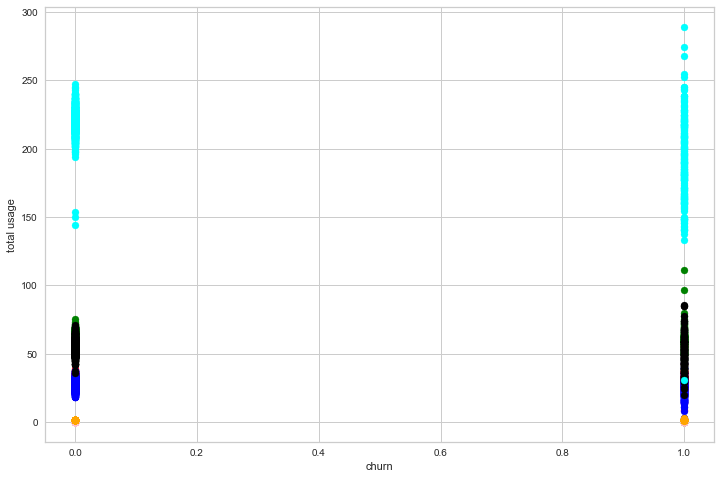

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(final_df['churn'], final_df['average_data_roaming'], color='green')
plt.scatter(final_df['churn'], final_df['average_data_non_roaming'], color='red')
plt.scatter(final_df['churn'], final_df['average_minutes_roaming'], color='blue')
plt.scatter(final_df['churn'], final_df['average_minutes_non_roaming_our_operator'], color='black')
plt.scatter(final_df['churn'], final_df['average_minutes_non_roaming_other_operator'], color='cyan')
plt.scatter(final_df['churn'], final_df['average_sms_roaming'], color='yellow')
plt.scatter(final_df['churn'], final_df['average_sms_non_roaming_our_operator'], color='pink')
plt.scatter(final_df['churn'], final_df['average_sms_non_roaming_other_operator'], color='orange')
plt.xlabel('churn')
plt.ylabel('total usage')
plt.show()

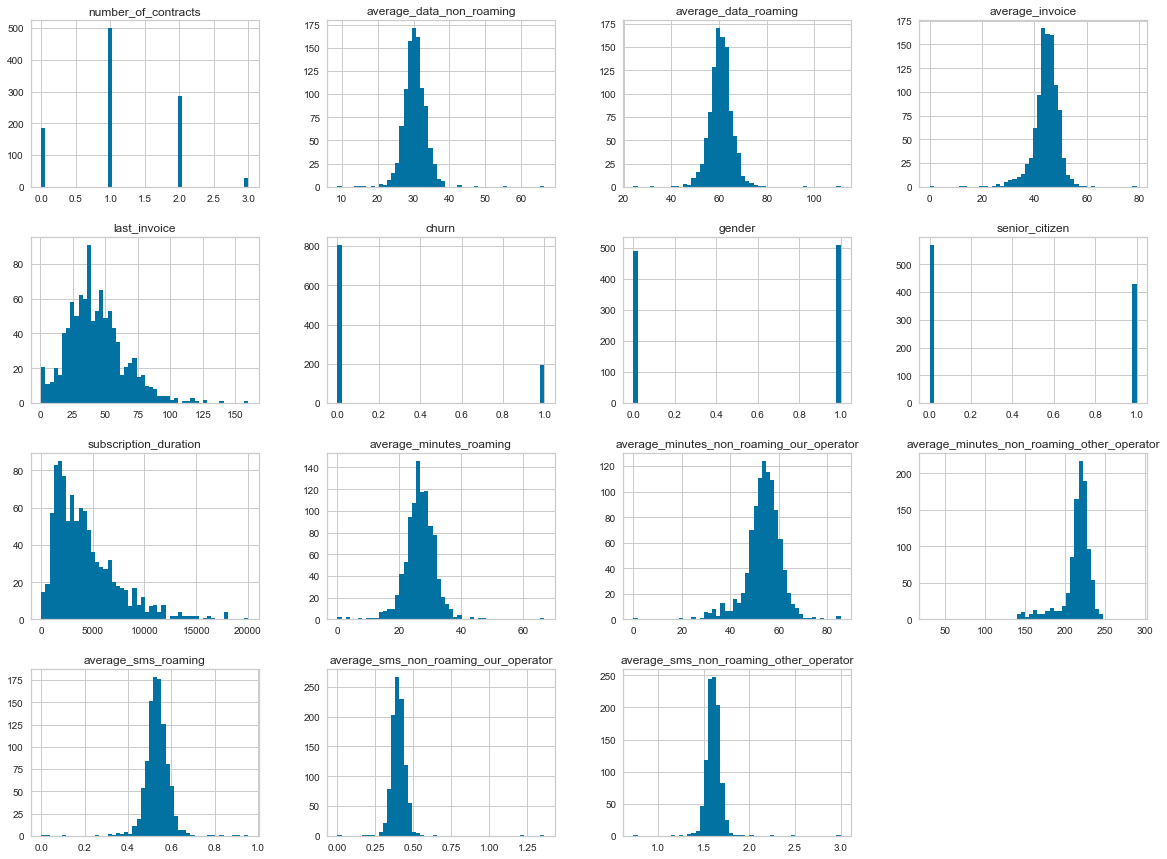

In [9]:
final_df.hist(bins=50, figsize=(20,15))
plt.show()

### The histograms follow the gaussian bell curve => standard distribution.

In [10]:
final_df.corr()

,number_of_contracts,average_data_non_roaming,average_data_roaming,average_invoice,last_invoice,churn,gender,senior_citizen,subscription_duration,average_minutes_roaming,average_minutes_non_roaming_our_operator,average_minutes_non_roaming_other_operator,average_sms_roaming,average_sms_non_roaming_our_operator,average_sms_non_roaming_other_operator
number_of_contracts,1.000000,0.016075,0.057640,0.250723,0.236302,-0.420402,-0.015298,-0.002106,-0.048147,0.123596,0.222922,0.290795,0.023473,-0.038337,0.021381
average_data_non_roaming,0.016075,1.000000,0.052149,-0.080212,-0.011197,-0.004703,-0.057260,-0.011917,-0.012141,-0.042372,0.100588,0.104867,0.009064,-0.087879,0.009550
average_data_roaming,0.057640,0.052149,1.000000,0.091030,0.011150,-0.095361,0.010951,0.031187,-0.033254,0.142303,0.082508,0.082042,0.145892,0.088978,-0.143193
average_invoice,0.250723,-0.080212,0.091030,1.000000,0.339233,-0.447617,-0.040531,-0.017039,-0.085445,0.891755,0.344757,0.380208,0.309786,0.222141,-0.209411
last_invoice,0.236302,-0.011197,0.011150,0.339233,1.000000,-0.338750,-0.002570,-0.082225,-0.122217,0.251649,0.221406,0.299763,0.009466,-0.007738,0.029200
churn,-0.420402,-0.004703,-0.095361,-0.447617,-0.338750,1.000000,0.052601,0.016398,0.058788,-0.242691,-0.365780,-0.557525,-0.064525,0.067162,-0.000091
gender,-0.015298,-0.057260,0.010951,-0.040531,-0.002570,0.052601,1.000000,-0.021095,0.011545,-0.028943,-0.000195,-0.050166,-0.037516,0.016889,-0.038856
senior_citizen,-0.002106,-0.011917,0.031187,-0.017039,-0.082225,0.016398,-0.021095,1.000000,0.096253,-0.020441,-0.004420,-0.048135,0.030310,-0.033124,0.018367
subscription_duration,-0.048147,-0.012141,-0.033254,-0.085445,-0.122217,0.058788,0.011545,0.096253,1.000000,-0.051188,-0.126266,-0.178154,-0.044888,-0.012313,-0.005007
average_minutes_roaming,0.123596,-0.042372,0.142303,0.891755,0.251649,-0.242691,-0.028943,-0.020441,-0.051188,1.000000,0.205983,0.201522,0.144473,0.228958,-0.161052


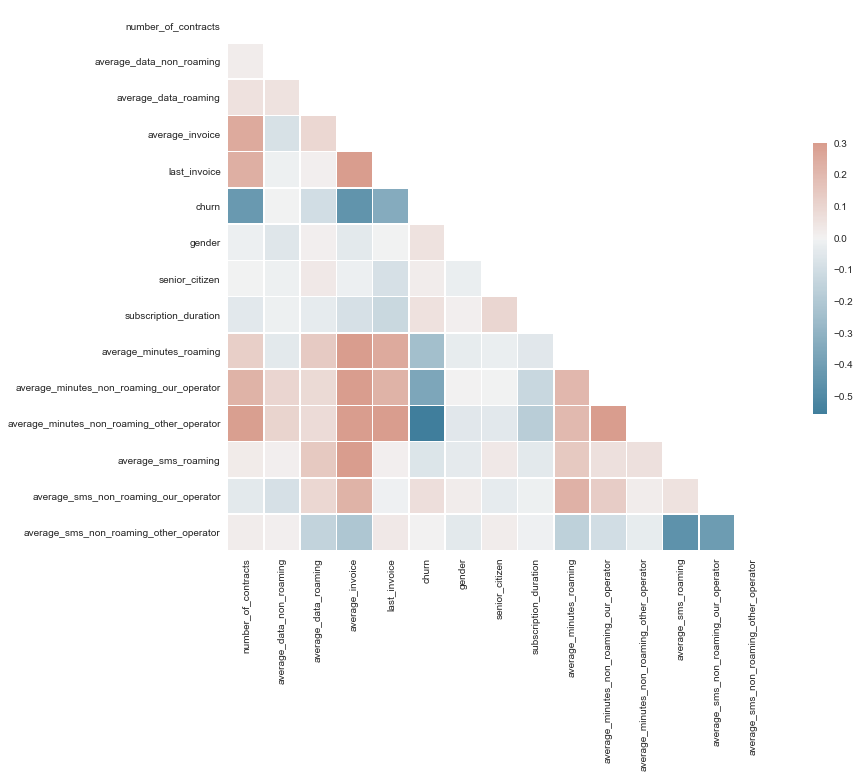

In [11]:
def plot_corr_matrix(input_df):
    corr = input_df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle:
    f, ax = plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.plot()
    
plot_corr_matrix(final_df)

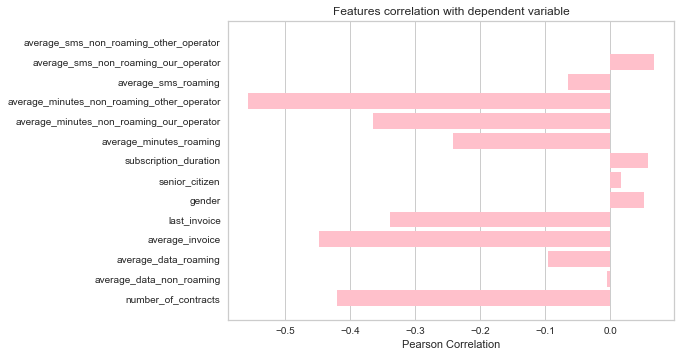

In [12]:
X = final_df.drop(columns=['churn'])
y = final_df['churn']

visualizer = FeatureCorrelation(labels=X.columns, method='pearson', color='pink')
visualizer.fit(X, y)
visualizer.poof()
plt.show()

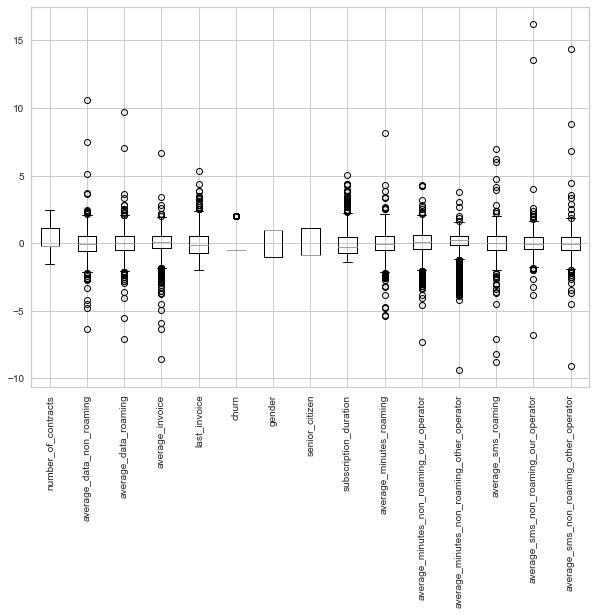

In [13]:
scaler = StandardScaler()
scaler = scaler.fit(final_df)
standardized_features = scaler.transform(final_df)

standardized_features_df = pd.DataFrame(standardized_features, columns=final_df.columns)
standardized_features_df.boxplot(figsize=(10,7), rot=90)
plt.show()

In [14]:
f_val, p_val = f_oneway(final_df['average_sms_roaming'], final_df['churn'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 725.1863464182546 , P = 1.5520669585121927e-136
